### 파이썬 머신러닝
## 비지도 학습과 데이터 전처리
---
# MNIST 숫자이미지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
dir(mnist)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
mnist.images.shape

(1797, 8, 8)

In [6]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
mnist.images.max(), mnist.images.min()

(16.0, 0.0)

In [9]:
np.where(mnist.images==16)[0].shape

(10456,)

Text(0.5,1,'4')

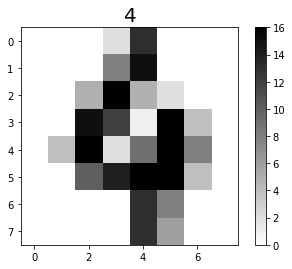

In [11]:
plt.imshow(mnist.images[100], vmin=0, vmax=16, cmap='gray_r')
plt.colorbar()
plt.title(mnist.target[100], fontsize=20)

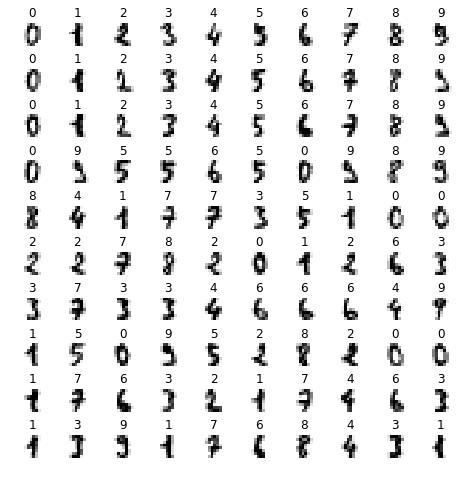

In [15]:
plt.figure(figsize=[8,8])
plt.subplots_adjust(hspace=1)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r')
    plt.axis('off')
    plt.title(mnist.target[i])

In [11]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
np.bincount(mnist.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [6]:
mnist.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 이미지 저장위치

- C:\Anaconda3\Lib\site-packages\sklearn\datasets\data\digits.csv.gz
- 압축을 풀면 digits.csv 파일을 얻는다.
- 아래에서 직접 읽어와 보자.

In [16]:
data = np.loadtxt('digits.csv', delimiter=',')
data.shape

(1797, 65)

In [18]:
data.dtype

dtype('float64')

In [17]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  0.])

Text(0.5,1,'0.0')

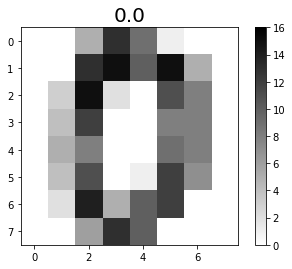

In [9]:
X = data[:,:-1].reshape(-1,8,8)
y = data[:,-1]

plt.imshow(X[0], vmin=0, vmax=16, cmap='gray_r')
plt.colorbar()
plt.title(y[0], fontsize=20)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9555555555555556

In [21]:
pred_y = model.predict(X_test)

In [22]:
idx = np.where(pred_y != y_test)[0]
idx

array([  6,  11,  32,  46,  67,  84,  86, 105, 106, 118, 129, 153, 166,
       186, 201, 278, 293, 316, 333, 399], dtype=int64)

In [23]:
pred_y[idx]

array([5, 2, 8, 9, 5, 8, 8, 2, 8, 1, 8, 4, 3, 8, 1, 8, 9, 2, 1, 8])

In [24]:
y_test[idx]

array([6, 8, 1, 1, 9, 7, 7, 3, 9, 4, 1, 0, 9, 9, 8, 9, 7, 5, 8, 9])

In [25]:
y_test[pred_y!=y_test]

array([6, 8, 1, 1, 9, 7, 7, 3, 9, 4, 1, 0, 9, 9, 8, 9, 7, 5, 8, 9])

In [26]:
pred_y[pred_y!=y_test]

array([5, 2, 8, 9, 5, 8, 8, 2, 8, 1, 8, 4, 3, 8, 1, 8, 9, 2, 1, 8])

In [28]:
X_error = X_test[pred_y!=y_test]

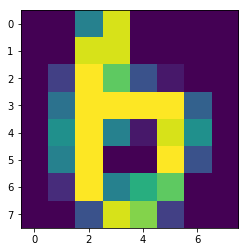

In [30]:
plt.imshow(X_error[0].reshape(8,8))

In [31]:
np.bincount(y_test[idx])

array([1, 3, 0, 1, 1, 1, 1, 3, 3, 6], dtype=int64)

In [32]:
np.bincount(pred_y[idx])

array([0, 3, 3, 1, 1, 2, 0, 0, 8, 2], dtype=int64)

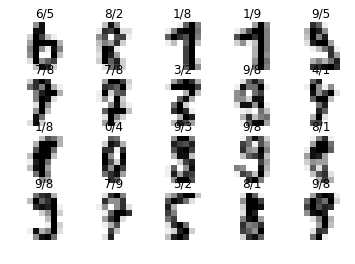

In [33]:
#plt.figure(figsize=[10,10])
for i in range(len(idx)):
    plt.subplot(np.ceil(len(idx)/5),5,i+1)
    plt.imshow(X_test[idx[i]].reshape(8,8), cmap='gray_r')
    plt.title('%d/%d' % (y_test[idx[i]],pred_y[idx[i]]))
    plt.axis('off')

In [34]:
y_test

array([9, 5, 0, 0, 4, 4, 6, 8, 4, 9, 5, 8, 7, 0, 7, 1, 2, 9, 3, 4, 3, 2,
       5, 1, 1, 8, 8, 3, 9, 8, 8, 6, 1, 0, 3, 6, 6, 8, 4, 3, 1, 8, 7, 6,
       5, 3, 1, 3, 4, 6, 4, 6, 9, 7, 6, 8, 0, 6, 8, 5, 3, 9, 6, 4, 6, 3,
       0, 9, 4, 0, 9, 7, 7, 8, 9, 5, 0, 9, 6, 2, 3, 5, 8, 1, 7, 3, 7, 5,
       2, 5, 1, 7, 4, 8, 7, 0, 2, 1, 0, 4, 4, 3, 2, 5, 9, 3, 9, 9, 5, 3,
       2, 1, 6, 9, 2, 7, 2, 3, 4, 3, 2, 5, 8, 1, 4, 0, 4, 6, 5, 1, 9, 4,
       1, 9, 4, 7, 1, 9, 2, 4, 0, 4, 6, 1, 7, 1, 5, 2, 6, 1, 6, 7, 8, 0,
       3, 0, 9, 1, 3, 0, 3, 2, 4, 4, 5, 6, 9, 5, 0, 1, 7, 3, 3, 3, 5, 9,
       3, 9, 4, 2, 3, 8, 2, 2, 9, 0, 9, 1, 9, 6, 7, 2, 3, 1, 3, 4, 0, 2,
       2, 9, 9, 8, 1, 3, 6, 6, 0, 1, 7, 4, 8, 4, 1, 0, 2, 7, 6, 8, 7, 8,
       1, 0, 4, 2, 7, 1, 3, 2, 2, 9, 1, 7, 6, 7, 2, 2, 6, 2, 1, 9, 0, 8,
       4, 9, 4, 4, 0, 1, 8, 7, 7, 5, 2, 6, 0, 2, 2, 2, 4, 3, 7, 7, 3, 4,
       5, 3, 7, 5, 4, 0, 0, 6, 3, 3, 0, 1, 0, 4, 9, 1, 8, 2, 4, 3, 4, 0,
       0, 7, 6, 9, 1, 8, 9, 7, 5, 6, 3, 8, 2, 2, 7,

In [35]:
pred_y

array([9, 5, 0, 0, 4, 4, 5, 8, 4, 9, 5, 2, 7, 0, 7, 1, 2, 9, 3, 4, 3, 2,
       5, 1, 1, 8, 8, 3, 9, 8, 8, 6, 8, 0, 3, 6, 6, 8, 4, 3, 1, 8, 7, 6,
       5, 3, 9, 3, 4, 6, 4, 6, 9, 7, 6, 8, 0, 6, 8, 5, 3, 9, 6, 4, 6, 3,
       0, 5, 4, 0, 9, 7, 7, 8, 9, 5, 0, 9, 6, 2, 3, 5, 8, 1, 8, 3, 8, 5,
       2, 5, 1, 7, 4, 8, 7, 0, 2, 1, 0, 4, 4, 3, 2, 5, 9, 2, 8, 9, 5, 3,
       2, 1, 6, 9, 2, 7, 2, 3, 1, 3, 2, 5, 8, 1, 4, 0, 4, 6, 5, 8, 9, 4,
       1, 9, 4, 7, 1, 9, 2, 4, 0, 4, 6, 1, 7, 1, 5, 2, 6, 1, 6, 7, 8, 4,
       3, 0, 9, 1, 3, 0, 3, 2, 4, 4, 5, 6, 3, 5, 0, 1, 7, 3, 3, 3, 5, 9,
       3, 9, 4, 2, 3, 8, 2, 2, 9, 0, 8, 1, 9, 6, 7, 2, 3, 1, 3, 4, 0, 2,
       2, 9, 9, 1, 1, 3, 6, 6, 0, 1, 7, 4, 8, 4, 1, 0, 2, 7, 6, 8, 7, 8,
       1, 0, 4, 2, 7, 1, 3, 2, 2, 9, 1, 7, 6, 7, 2, 2, 6, 2, 1, 9, 0, 8,
       4, 9, 4, 4, 0, 1, 8, 7, 7, 5, 2, 6, 0, 2, 2, 2, 4, 3, 7, 7, 3, 4,
       5, 3, 7, 5, 4, 0, 0, 6, 3, 3, 0, 1, 0, 4, 8, 1, 8, 2, 4, 3, 4, 0,
       0, 7, 6, 9, 1, 8, 9, 9, 5, 6, 3, 8, 2, 2, 7,

In [37]:
list(zip(y_test, pred_y))

[(9, 9),
 (5, 5),
 (0, 0),
 (0, 0),
 (4, 4),
 (4, 4),
 (6, 5),
 (8, 8),
 (4, 4),
 (9, 9),
 (5, 5),
 (8, 2),
 (7, 7),
 (0, 0),
 (7, 7),
 (1, 1),
 (2, 2),
 (9, 9),
 (3, 3),
 (4, 4),
 (3, 3),
 (2, 2),
 (5, 5),
 (1, 1),
 (1, 1),
 (8, 8),
 (8, 8),
 (3, 3),
 (9, 9),
 (8, 8),
 (8, 8),
 (6, 6),
 (1, 8),
 (0, 0),
 (3, 3),
 (6, 6),
 (6, 6),
 (8, 8),
 (4, 4),
 (3, 3),
 (1, 1),
 (8, 8),
 (7, 7),
 (6, 6),
 (5, 5),
 (3, 3),
 (1, 9),
 (3, 3),
 (4, 4),
 (6, 6),
 (4, 4),
 (6, 6),
 (9, 9),
 (7, 7),
 (6, 6),
 (8, 8),
 (0, 0),
 (6, 6),
 (8, 8),
 (5, 5),
 (3, 3),
 (9, 9),
 (6, 6),
 (4, 4),
 (6, 6),
 (3, 3),
 (0, 0),
 (9, 5),
 (4, 4),
 (0, 0),
 (9, 9),
 (7, 7),
 (7, 7),
 (8, 8),
 (9, 9),
 (5, 5),
 (0, 0),
 (9, 9),
 (6, 6),
 (2, 2),
 (3, 3),
 (5, 5),
 (8, 8),
 (1, 1),
 (7, 8),
 (3, 3),
 (7, 8),
 (5, 5),
 (2, 2),
 (5, 5),
 (1, 1),
 (7, 7),
 (4, 4),
 (8, 8),
 (7, 7),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (4, 4),
 (4, 4),
 (3, 3),
 (2, 2),
 (5, 5),
 (9, 9),
 (3, 2),
 (9, 8),
 (9, 9),
 (5, 5),
 (3, 3),
 (2, 2),
 

In [41]:
np.bincount(pred_y[y_test==3])

array([ 0,  0,  1, 45], dtype=int64)

In [43]:
help(np.bincount)

Help on built-in function bincount in module numpy.core.multiarray:

bincount(...)
    bincount(x, weights=None, minlength=0)
    
    Count number of occurrences of each value in array of non-negative ints.
    
    The number of bins (of size 1) is one larger than the largest value in
    `x`. If `minlength` is specified, there will be at least this number
    of bins in the output array (though it will be longer if necessary,
    depending on the contents of `x`).
    Each bin gives the number of occurrences of its index value in `x`.
    If `weights` is specified the input array is weighted by it, i.e. if a
    value ``n`` is found at position ``i``, ``out[n] += weight[i]`` instead
    of ``out[n] += 1``.
    
    Parameters
    ----------
    x : array_like, 1 dimension, nonnegative ints
        Input array.
    weights : array_like, optional
        Weights, array of the same shape as `x`.
    minlength : int, optional
        A minimum number of bins for the output array.
    
 

In [45]:
result = np.zeros([10,10])
for i in range(10):
    #a = np.bincount(pred_y[y_test==i])
    #result[i,:len(a)] = a
    result[i] = np.bincount(pred_y[y_test==i], minlength=10)
    
result

array([[42.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 44.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.],
       [ 0.,  0., 51.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 45.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., 46.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0., 39.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., 37.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 49.,  2.,  1.],
       [ 0.,  2.,  1.,  0.,  0.,  0.,  0.,  0., 36.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  4., 41.]])

In [18]:
pred_y = model.predict(X_test)

result = np.zeros([10,10])
for i,j in zip(y_test, pred_y):
    result[i,j] +=1
    
result

array([[44.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 51.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  0.],
       [ 0.,  0., 41.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 48.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0., 50.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0., 41.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1., 41.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 42.,  0.,  1.],
       [ 0.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 37.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  3., 34.]])

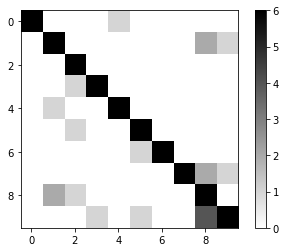

In [51]:
plt.imshow(result, vmin=0, vmax=6, cmap='gray_r')
plt.colorbar()

### PCA 적용

In [52]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca.components_.shape

(64, 64)

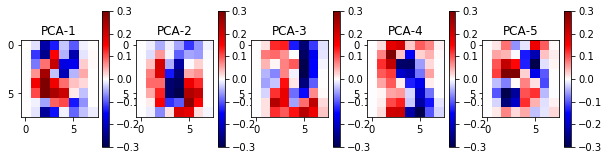

In [59]:
plt.figure(figsize=[10,5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pca.components_[i].reshape(8,8), cmap='seismic', vmin=-0.3, vmax=0.3)
    plt.colorbar(shrink=0.5)
    plt.title('PCA-'+str(i+1))

In [60]:
X_pca = pca.transform(mnist.data)
X_pca.shape

(1797, 64)

In [81]:
np.argsort(np.abs(X_pca[:,1]))[-10:]

array([ 465, 1082, 1603, 1307, 1105, 1470, 1620, 1317,  565, 1106],
      dtype=int64)

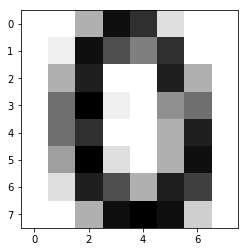

In [82]:
plt.imshow(mnist.data[1106].reshape(8,8), cmap='gray_r')

In [61]:
X_pca[:5]

array([[-1.25946645e+00,  2.12748835e+01, -9.46305462e+00,
         1.30141887e+01, -7.12882278e+00, -7.44065876e+00,
         3.25283716e+00,  2.55347036e+00, -5.81842142e-01,
         3.62569695e+00,  2.58595688e+00,  1.55160708e+00,
         8.54496709e-01, -3.33874935e+00,  5.90658968e+00,
         2.74359339e+00,  4.19836907e-01, -8.98149693e-01,
         7.02610866e-01, -3.46211868e+00,  2.68084958e+00,
         1.00944951e+00,  2.00970276e+00,  1.29531479e+00,
         1.17887873e+00,  2.30058185e+00,  3.67072108e+00,
        -9.43668900e-01, -1.13250195e+00,  2.35979550e+00,
        -1.81738593e+00, -7.55016284e-01,  1.62841809e-01,
        -2.11297739e+00,  1.09482318e+00,  1.95685532e-01,
        -8.99936129e-02, -2.76374068e+00,  1.08888322e+00,
         2.06004009e-01,  1.70451133e+00,  5.81318379e-01,
         7.12698392e-01, -1.88038868e-01,  6.28313404e-01,
        -5.94986903e-01,  4.76923307e-02, -7.13294070e-01,
        -3.39315207e-01,  4.30994090e-02, -4.21401144e-0

### PCA 변환 결과 산점도 그리기

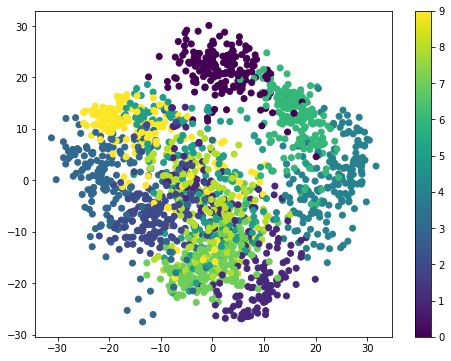

In [22]:
plt.figure(figsize=[8,6])
plt.scatter(X_pca[:,0], X_pca[:,1], c=mnist.target)
plt.colorbar()

In [23]:
xmax, ymax = X_pca.max(axis=0)
xmin, ymin = X_pca.min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

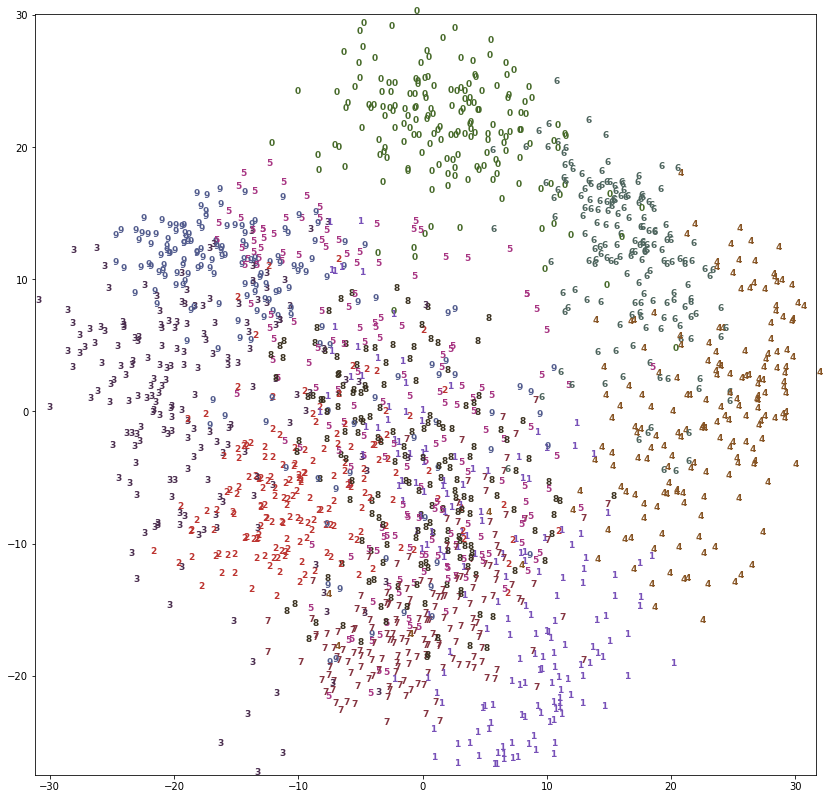

In [24]:
plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(len(X_pca)):
    plt.text(X_pca[i,0], X_pca[i,1], str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})

### PCA 이미지 복원

In [25]:
recovered2 = np.matmul(X_pca, pca.components_)
# recovered2 = np.dot(X_pca, pca.components_)
# recovered2 = X_pca @ pca.components_

In [26]:
recovered2[0].min(), recovered2[0].max()

(-6.680015944932666, 6.2553130424465735)

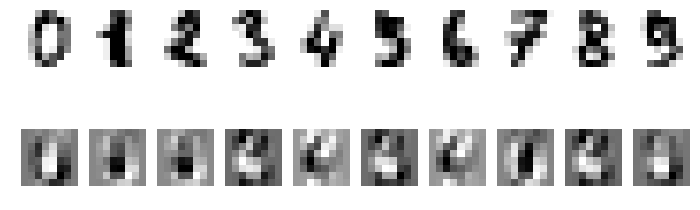

In [27]:
plt.figure(figsize=[12,4])
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,10+i+1)
    plt.imshow(recovered2[i].reshape(8,8), cmap='gray_r')
    plt.axis('off')

### k-NN 적용

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
knn.fit(mnist.data, mnist.target)
knn.score(mnist.data, mnist.target)

0.9905397885364496

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9911111111111112

### 다른 모델 적용

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9622222222222222

In [95]:
from sklearn.svm import LinearSVC

lr = LinearSVC()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.96

In [102]:
from sklearn.svm import SVC

svc = SVC(gamma=0.01)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7022222222222222

In [94]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=13)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8422222222222222

In [96]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8644444444444445

### 일대다 분류

In [103]:
### 0과 나머지에 대한 분류
y = mnist.target.copy()
y = np.where(y==0, 1, 0) # 0 은 1, 나머지는 0

X_train, X_test, y_train, y_test = train_test_split(mnist.data, y)
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.9955555555555555


- 모든 숫자(0~9)에 있어 자신과 나머지에 대한 스코어를 구하시오
- 결과를 plt.plot() 으로 그리시오.

- Logistic Regression

In [120]:
scores_lr = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(mnist.data, y)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    scores_lr.append(score)
    
scores_lr

[1.0,
 0.9777777777777777,
 0.9977777777777778,
 0.9866666666666667,
 0.9955555555555555,
 0.9844444444444445,
 0.9933333333333333,
 0.9933333333333333,
 0.9466666666666667,
 0.9733333333333334]

Text(0.5,1,'Logistic Regression')

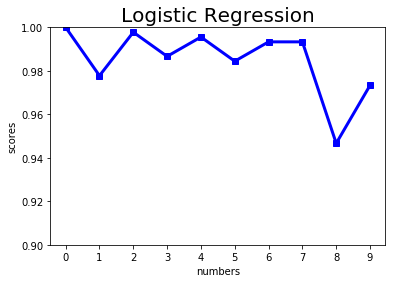

In [121]:
plt.plot(scores_lr, 'bs-', lw=3)
plt.xlabel('numbers')
plt.ylabel('scores')
plt.xticks(range(10))
plt.ylim(0.9, 1.0)
plt.title('Logistic Regression', fontsize=20)

- k-NN

In [126]:
scores_knn = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(mnist.data, y)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores_knn.append(score)
    
scores_knn

[1.0,
 0.9977777777777778,
 0.9977777777777778,
 0.9955555555555555,
 1.0,
 0.9911111111111112,
 0.9955555555555555,
 1.0,
 0.9955555555555555,
 0.9955555555555555]

Text(0.5,1,'k-NN')

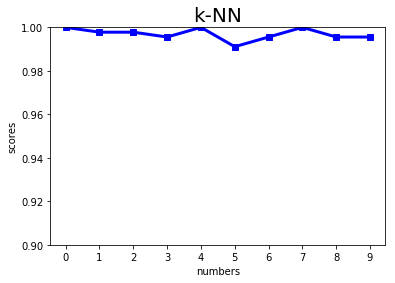

In [127]:
plt.plot(scores_knn, 'bs-', lw=3)
plt.xlabel('numbers')
plt.ylabel('scores')
plt.xticks(range(10))
plt.ylim(0.9, 1.0)
plt.title('k-NN', fontsize=20)

- Decision Tree

In [143]:
scores_tree = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(mnist.data, y)

    tree = DecisionTreeClassifier(max_depth=7)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores_tree.append(score)
    
scores_tree

[0.9822222222222222,
 0.9755555555555555,
 0.9733333333333334,
 0.98,
 0.9622222222222222,
 0.9644444444444444,
 0.9822222222222222,
 0.9711111111111111,
 0.9288888888888889,
 0.9311111111111111]

Text(0.5,1,'Decision Tree')

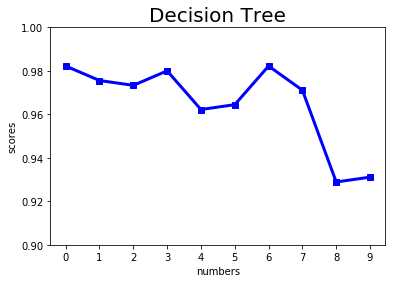

In [144]:
plt.plot(scores_tree, 'bs-', lw=3)
plt.xlabel('numbers')
plt.ylabel('scores')
plt.xticks(range(10))
plt.ylim(0.9, 1.0)
plt.title('Decision Tree', fontsize=20)

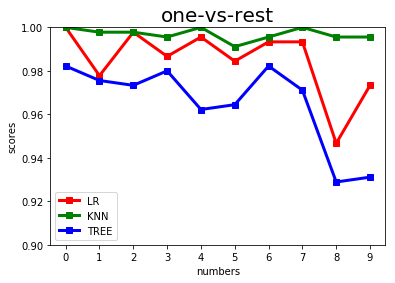

In [145]:
plt.plot(scores_lr, 'rs-', lw=3)
plt.plot(scores_knn, 'gs-', lw=3)
plt.plot(scores_tree, 'bs-', lw=3)

plt.xlabel('numbers')
plt.ylabel('scores')
plt.xticks(range(10))
plt.ylim(0.9, 1.0)
plt.title('one-vs-rest', fontsize=20)
plt.legend(['LR', 'KNN', 'TREE'])

### 클래스 편중 문제
- 숫자 0 과 나머지를 비교할 때, 데이터의 비율이 1:9 이다.
- 이 경우, 숫자가 0이 아니라고 판단하면 90% 는 맞는다.
- 즉, 90% 를 많이 넘어서야 의미있는 결과이다.

In [150]:
np.bincount(mnist.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [162]:
y = mnist.target.copy()
y = np.where(y==8, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(mnist.data, y)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9511111111111111

In [163]:
pred_y = model.predict(X_test)
pred_y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [166]:
(pred_y!=y_test).sum()

22

In [167]:
pred_y[pred_y!=y_test]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [168]:
y_test[pred_y!=y_test]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [169]:
result = pred_y[y_test==1]
result

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [170]:
np.bincount(result)

array([13, 22], dtype=int64)

In [171]:
22/35

0.6285714285714286

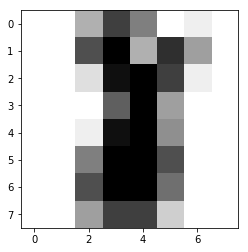

In [176]:
plt.imshow(X_test[pred_y!=y_test][-1].reshape(8,8), cmap='gray_r')

- 자신을 자신이라고 제대로 판별한 확률을 0~9까지 구하시오.

### 선택된 숫자 중에서 맞춘 확률 표시

- 로지스틱 회귀

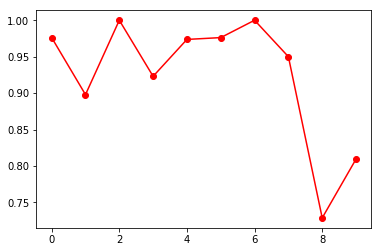

In [178]:
scores_lr = []
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

for digit in range(10):
    y_train2 = np.where(y_train==digit, 1, 0)
    y_test2 = np.where(y_test==digit, 1, 0)

    lr = LogisticRegression()
    lr.fit(X_train, y_train2)
    pred_y = lr.predict(X_test)
    result = pred_y[y_test2==1]
    scores_lr.append((result==1).sum()/len(result))
    
plt.plot(scores_lr, 'ro-')

- k-NN

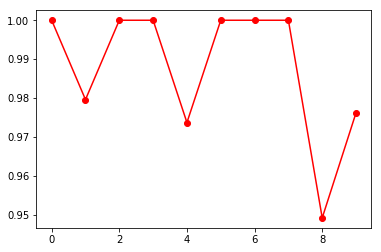

In [179]:
scores_knn = []

for digit in range(10):
    y_train2 = np.where(y_train==digit, 0, 1)
    y_test2 = np.where(y_test==digit, 0, 1)

    knn = KNeighborsClassifier(5)
    knn.fit(X_train, y_train2)
    pred_y = knn.predict(X_test)
    result = pred_y[y_test2==0]
    scores_knn.append((result==0).sum()/len(result))
    
plt.plot(scores_knn, 'ro-')

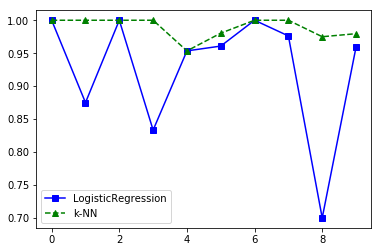

In [69]:
plt.plot(scores_lr, 'bs-')
plt.plot(scores_knn, 'g^--')
plt.legend(['LogisticRegression', 'k-NN'])

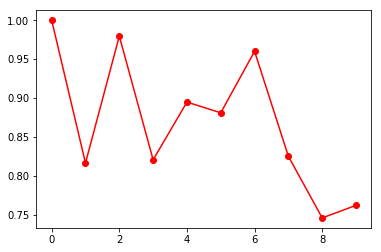

In [180]:
from sklearn.tree import DecisionTreeClassifier
scores_tree = []

for digit in range(10):
    y_train2 = np.where(y_train==digit, 0, 1)
    y_test2 = np.where(y_test==digit, 0, 1)

    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(X_train, y_train2)
    pred_y = tree.predict(X_test)
    result = pred_y[y_test2==0]
    scores_tree.append((result==0).sum()/len(result))
    
plt.plot(scores_tree, 'ro-')

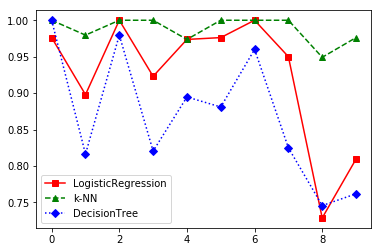

In [181]:
plt.plot(scores_lr, 'rs-')
plt.plot(scores_knn, 'g^--')
plt.plot(scores_tree, 'bD:')
plt.legend(['LogisticRegression', 'k-NN', 'DecisionTree'])

### t-SNE 적용

- t-SNE 는 매니폴드(manifold) 학습의 일종입니다. 매니폴드는 아래 그림에서 보듯이 고차원의 데이터가 숨겨져 있는 저차원으로 표현할 수 있을 것이라는 가정을 가지고 데이터를 변환하는 것입니다.<br>
<img src="ch03_03.jpg" />
(출처 : https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Manifold_learning_algorithms)<br><br>

- t-SNE(t-distributed stochastic neighbor embedding) 는 점들 사이의 거리를 기반으로 주로 2차원 평면 상에 점들을 뿌리는 방식입니다. 가까이 있는 점들은 가깝게 위치하려고 합니다. 그리고 가까운 점들에 가중치를 더 줘서 가까운 점들을 더 잘 보존하려고 합니다. (SVM 에서 배운 rbf 와 유사한 거리 함수를 사용합니다.)
- 숫자 이미지 데이터인 MNIST 를 가지고 테스트 하겠습니다.

In [182]:
from sklearn.manifold import TSNE

tsne = TSNE()

mnist_tsne = tsne.fit_transform(mnist.data)

In [183]:
mnist_tsne.shape

(1797, 2)

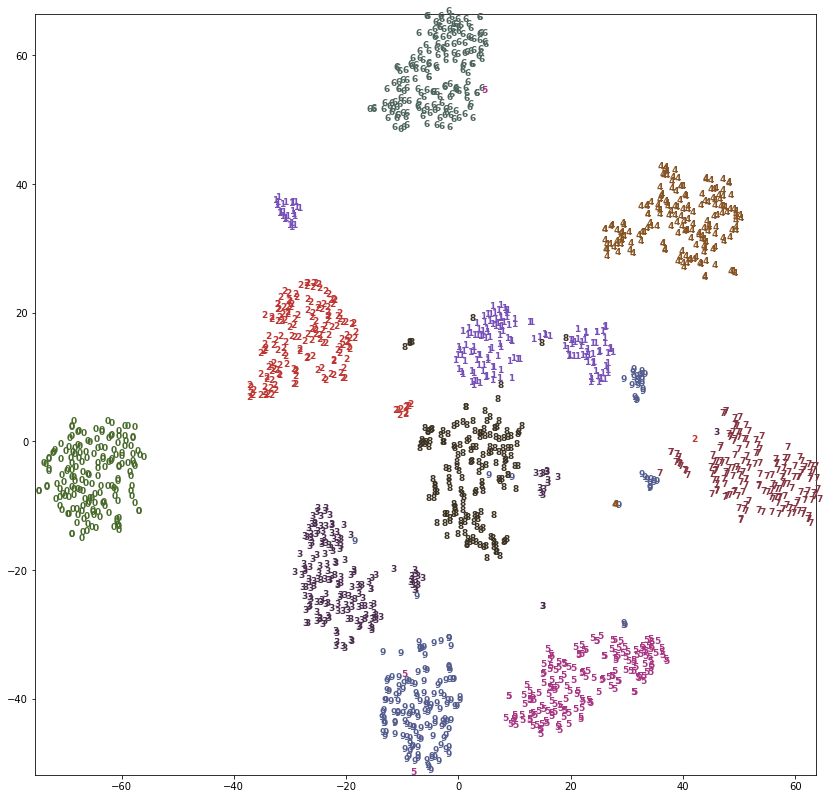

In [184]:
xmax, ymax = mnist_tsne.max(axis=0)
xmin, ymin = mnist_tsne.min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(mnist.data.shape[0]):
    plt.text(mnist_tsne[i,0], mnist_tsne[i,1],str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})